In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
import matplotlib.gridspec as gridspec
import scipy.stats as scipy
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# load dataset
sh = pd.read_csv("spotify_history.csv")
sh.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [3]:
# check columns
sh.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [4]:
# check for columns types
sh.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [5]:
# check for shape of the dataset
sh.shape

(149860, 11)

In [6]:
# check for null values
sh.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [7]:
sh["reason_end"].mode()

0    trackdone
Name: reason_end, dtype: object

In [8]:
sh["reason_end"] = sh["reason_end"].fillna("10")

In [9]:
sh["reason_start"].mode()

0    trackdone
Name: reason_start, dtype: object

In [10]:
sh["reason_start"].fillna("trackdone")

0          autoplay
1          clickrow
2          clickrow
3         trackdone
4          clickrow
            ...    
149855       fwdbtn
149856       fwdbtn
149857       fwdbtn
149858       fwdbtn
149859       fwdbtn
Name: reason_start, Length: 149860, dtype: object

In [11]:
sh['platform'].unique()
sh['reason_start'].unique()
sh['reason_end'].unique()


array(['clickrow', 'unknown', 'nextbtn', 'trackdone', 'backbtn', 'reload',
       'popup', 'endplay', 'fwdbtn', 'appload', '10',
       'unexpected-exit-while-paused', 'unexpected-exit', 'logout',
       'remote', 'trackerror'], dtype=object)

In [12]:
# change column ts to dataetime
sh['ts'] = pd.to_datetime(sh['ts'])

sh['hour'] = sh['ts'].dt.hour
sh['day_of_week'] = sh['ts'].dt.dayofweek
sh['month'] = sh['ts'].dt.month
sh['year'] = sh['ts'].dt.year


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\2275099165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=sh, palette='deep')


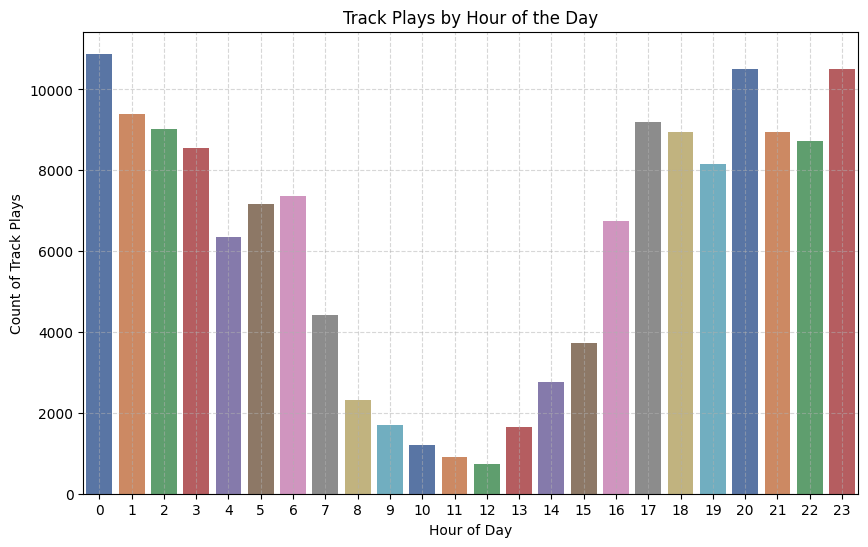

In [13]:
# Hourly track plays
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=sh, palette='deep')
plt.title('Track Plays by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Track Plays')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(24))
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\2940996705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=sh, palette='deep')


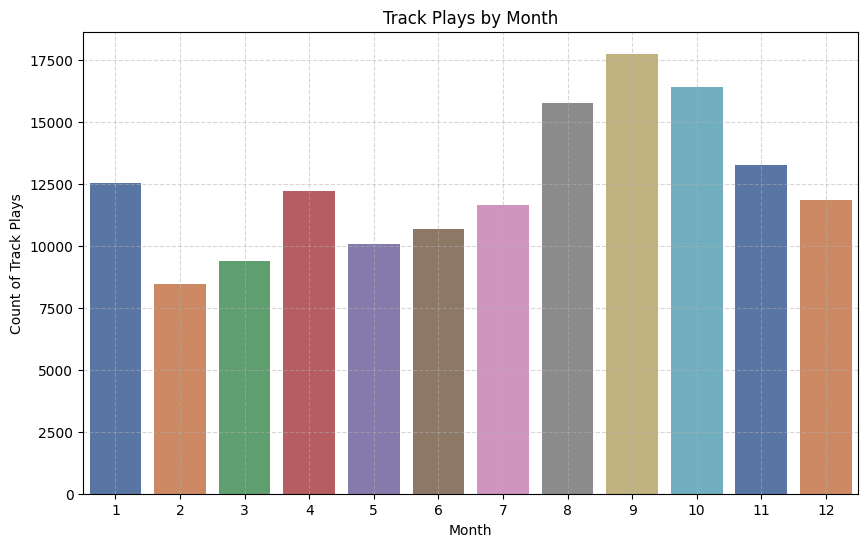

In [14]:
# Track Plays by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=sh, palette='deep')
plt.title('Track Plays by Month')
plt.xlabel('Month')
plt.ylabel('Count of Track Plays')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\2126438505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.index, y=top_tracks.values, palette='deep')


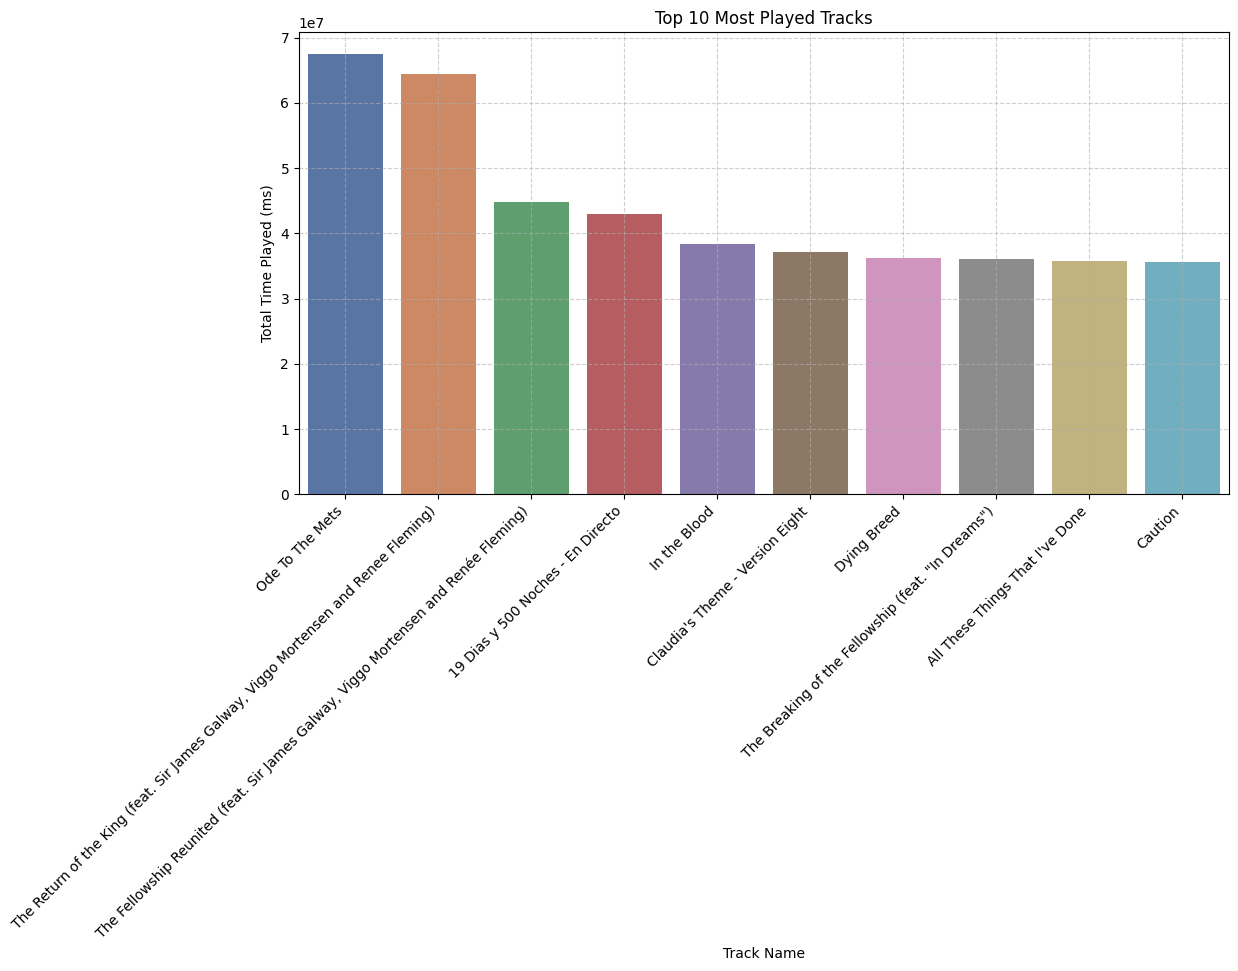

In [15]:
# Top 10 most played tracks based on total time played
top_tracks = sh.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tracks.index, y=top_tracks.values, palette='deep')
plt.title('Top 10 Most Played Tracks')
plt.xlabel('Track Name')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\852853121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='deep')


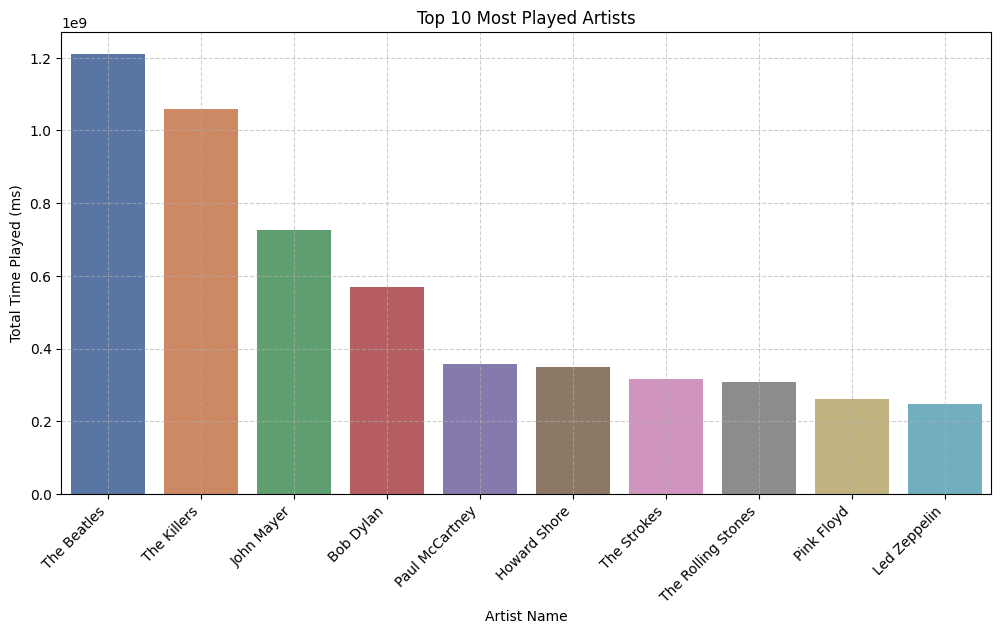

In [16]:
# Top 10 most played artists based on total time played
top_artists = sh.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='deep')
plt.title('Top 10 Most Played Artists')
plt.xlabel('Artist Name')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\2436788626.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


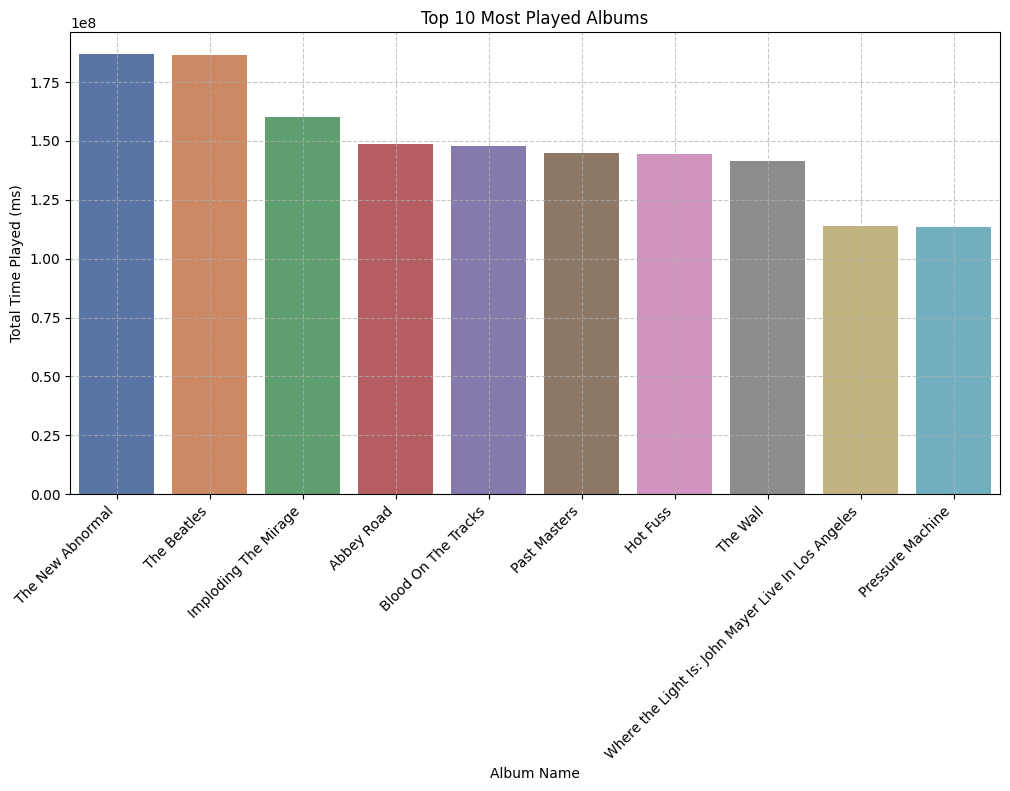

In [17]:
# Top 10 most played albums by total playtime
top_albums = (
    sh.groupby('album_name')['ms_played']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot with Seaborn style
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_albums.index,
    y=top_albums.values,
    palette='deep'
)

plt.title('Top 10 Most Played Albums')
plt.xlabel('Album Name')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


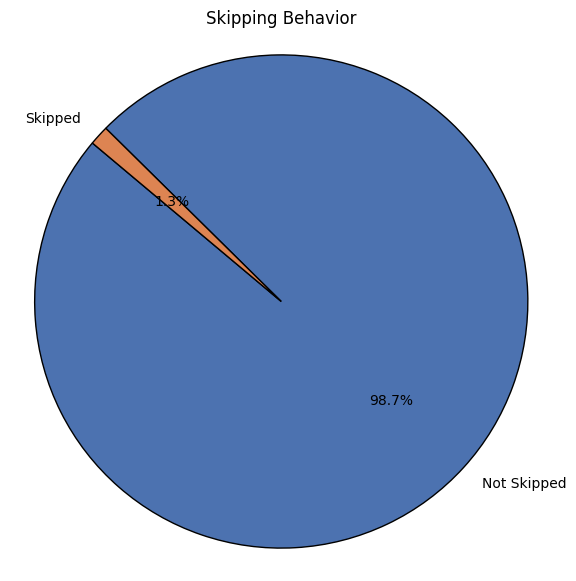

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skipping behavior analysis
skipped_play = sh.groupby('skipped')['ms_played'].sum()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('deep')[:2]  # Using Seaborn 'deep' palette
plt.pie(
    skipped_play, 
    labels=['Not Skipped', 'Skipped'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Skipping Behavior')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


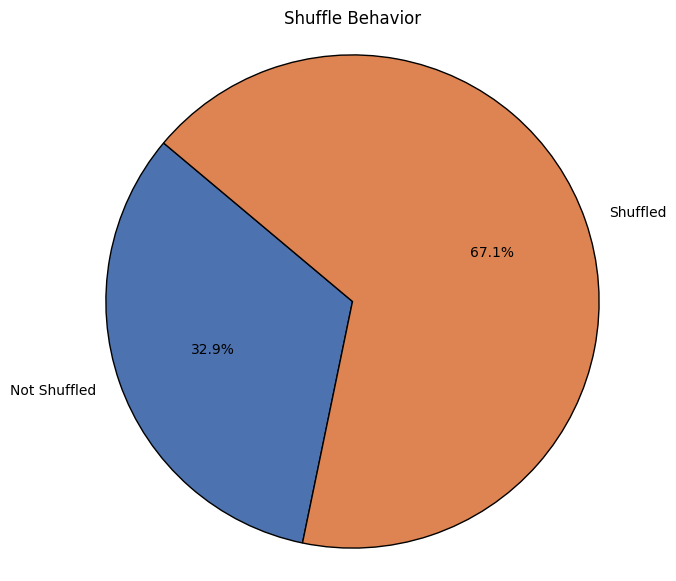

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Shuffle behavior analysis
shuffle_play = sh.groupby('shuffle')['ms_played'].sum()
plt.figure(figsize=(7, 7))
colors = sns.color_palette('deep')[:2]  # Using Seaborn 'deep' palette
plt.pie(
    shuffle_play, 
    labels=['Not Shuffled', 'Shuffled'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Shuffle Behavior')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\1104177509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='deep')


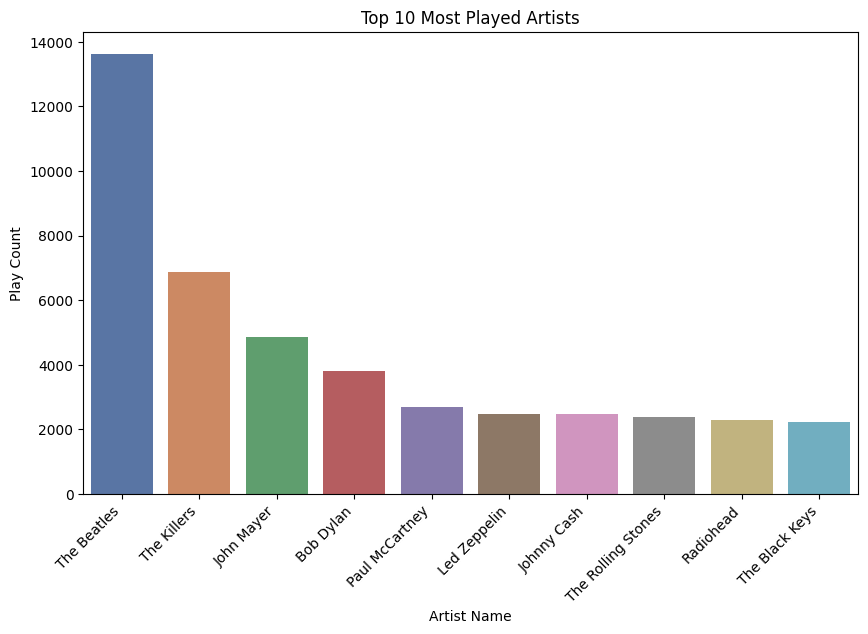

In [20]:
# Top 10 most played artists
top_artists = sh['artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='deep')
plt.title('Top 10 Most Played Artists')
plt.xlabel('Artist Name')
plt.ylabel('Play Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [21]:
sh.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'hour', 'day_of_week', 'month', 'year'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_14156\952998024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='platform', data=sh, palette='muted', order=sh['platform'].value_counts().index)


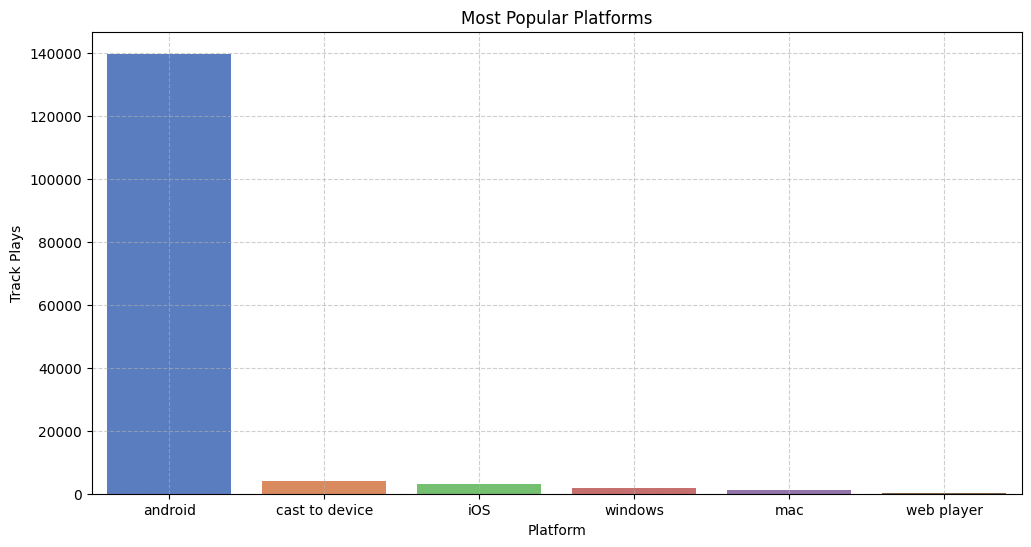

In [22]:
# Most popular platforms
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', data=sh, palette='muted', order=sh['platform'].value_counts().index)
plt.title('Most Popular Platforms')
plt.xlabel('Platform')
plt.ylabel('Track Plays')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


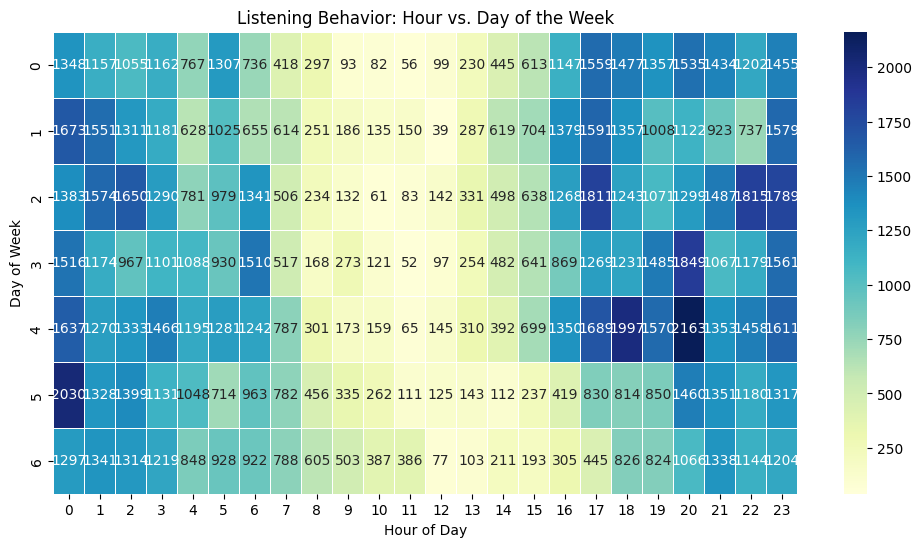

In [23]:
# Listening Behavior by Hour and Day of Week (Heatmap)
hourly_weekly = sh.groupby(['day_of_week', 'hour']).size().reset_index(name='plays')
pivot = hourly_weekly.pivot(index='day_of_week', columns='hour', values='plays')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Listening Behavior: Hour vs. Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [24]:
# Tracks played only once
rare_tracks = sh['track_name'].value_counts()[sh['track_name'].value_counts() == 1]
print(f"Number of tracks played only once: {len(rare_tracks)}")

# Never Skipped Tracks
never_skipped_tracks = sh[sh['skipped'] == 0]['track_name'].value_counts()
print(f"Number of tracks never skipped: {len(never_skipped_tracks)}")


Number of tracks played only once: 6999
Number of tracks never skipped: 12917


<Figure size 1000x600 with 0 Axes>

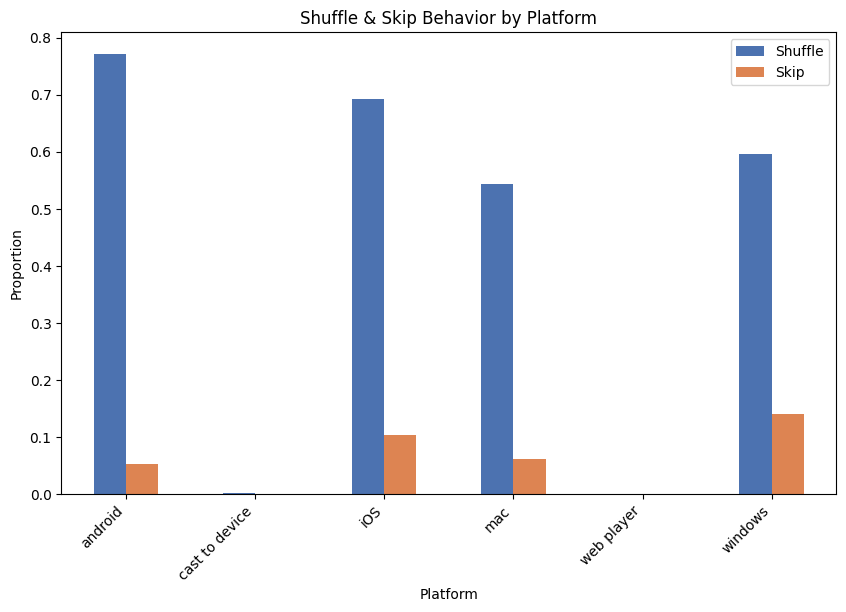

In [27]:
shuffle_skip = sh.groupby('platform')[['shuffle', 'skipped']].mean()

plt.figure(figsize=(10, 6))
shuffle_skip.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('deep')[:2])
plt.title("Shuffle & Skip Behavior by Platform")
plt.xlabel("Platform")
plt.ylabel("Proportion")
plt.legend(["Shuffle", "Skip"])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\2372738381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_listening.index, y=monthly_listening.values, palette='deep')


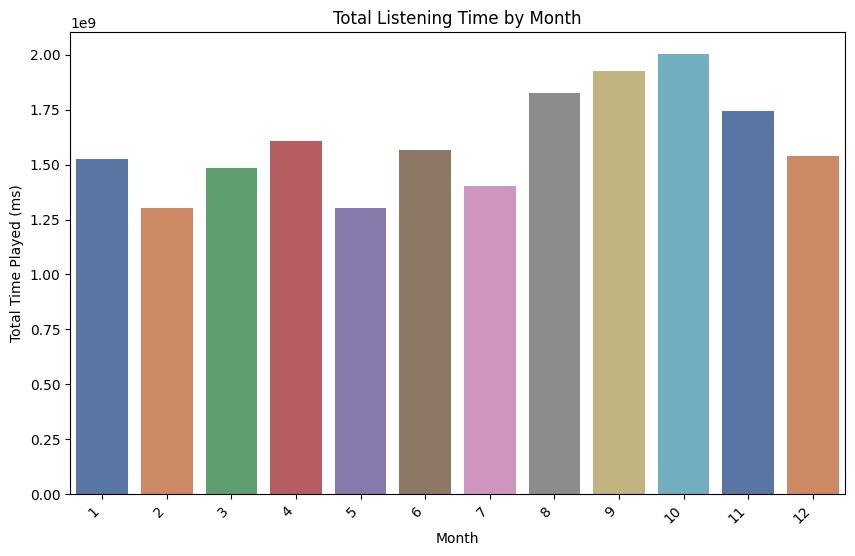

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_listening.index, y=monthly_listening.values, palette='deep')
plt.title("Total Listening Time by Month")
plt.xlabel("Month")
plt.ylabel("Total Time Played (ms)")
plt.xticks(rotation=45, ha='right')  # Rotating for better readability
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14156\530086566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=morning_evening.index, y=morning_evening.values, palette='deep')


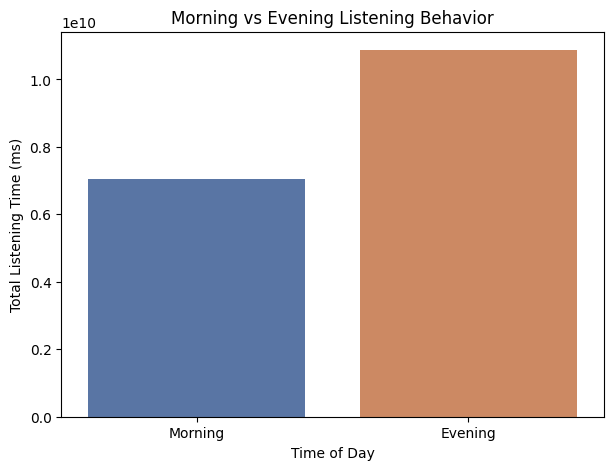

In [31]:
plt.figure(figsize=(7, 5))
sns.barplot(x=morning_evening.index, y=morning_evening.values, palette='deep')
plt.title("Morning vs Evening Listening Behavior")
plt.xlabel("Time of Day")
plt.ylabel("Total Listening Time (ms)")
plt.show()


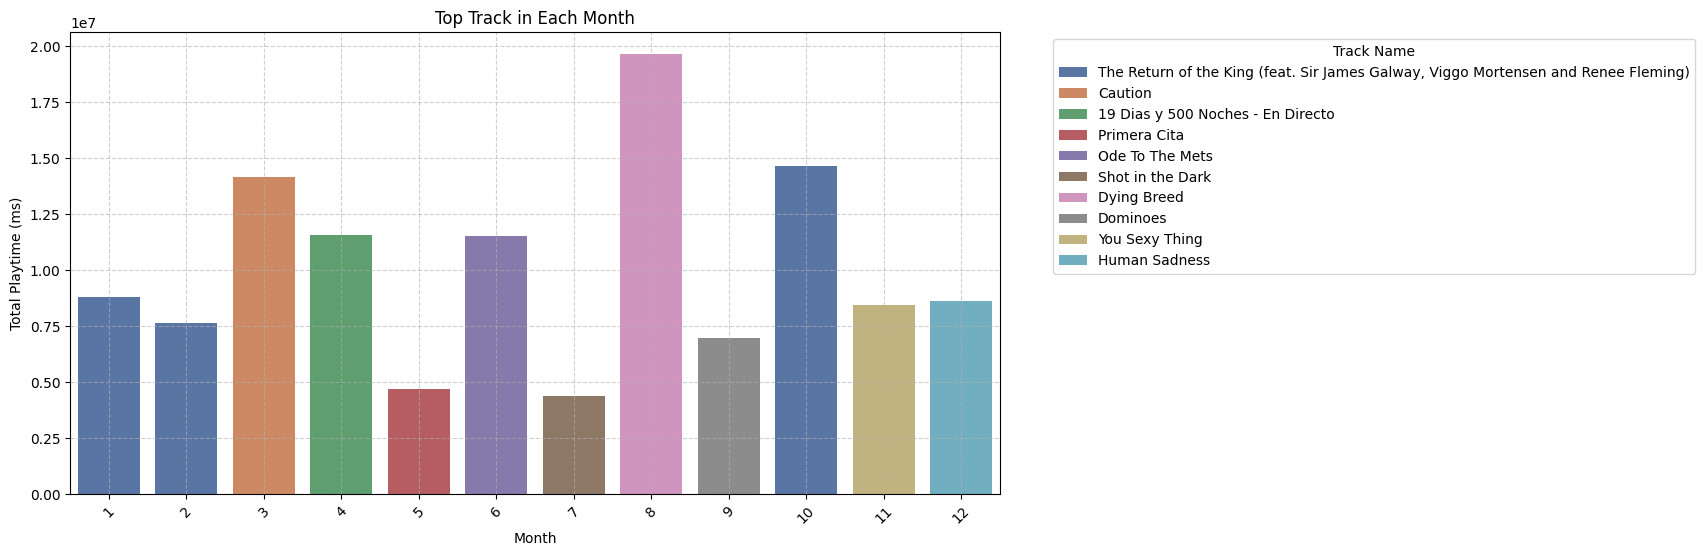

In [34]:
# Top track for each month 
top_tracks_by_month = (
    sh.groupby(['month', 'track_name'])['ms_played']
    .sum()
    .reset_index()
    .sort_values(['month', 'ms_played'], ascending=[True, False])
    .drop_duplicates(subset='month', keep='first')
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='month', 
    y='ms_played', 
    data=top_tracks_by_month, 
    hue='track_name', 
    dodge=False, 
    palette='deep'
)


plt.title('Top Track in Each Month')
plt.xlabel('Month')
plt.ylabel('Total Playtime (ms)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Track Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Encode categorical columns

In [36]:
# Label Encoding for categorical columns
label_encoders = {}
categorical_columns = ['platform', 'reason_start', 'reason_end', 'shuffle']

for col in categorical_columns:
    le = LabelEncoder()
    sh[col] = le.fit_transform(sh[col])
    label_encoders[col] = le


Select Features for Model Training

In [37]:
features = ['platform', 'ms_played', 'hour', 'day_of_week', 
            'month', 'reason_start', 'reason_end', 'shuffle']

X = sh[features]
y = sh['skipped']  # Target: Whether the user skipped the track or not


Step 6: Train-Test Split and Scaling

In [38]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#  Model Training and Evaluation
 Random Forest Classifier

In [39]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


 # Evaluate the Model

Accuracy: 0.9679478624493972
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     42597
        True       0.78      0.54      0.64      2361

    accuracy                           0.97     44958
   macro avg       0.88      0.77      0.81     44958
weighted avg       0.96      0.97      0.97     44958



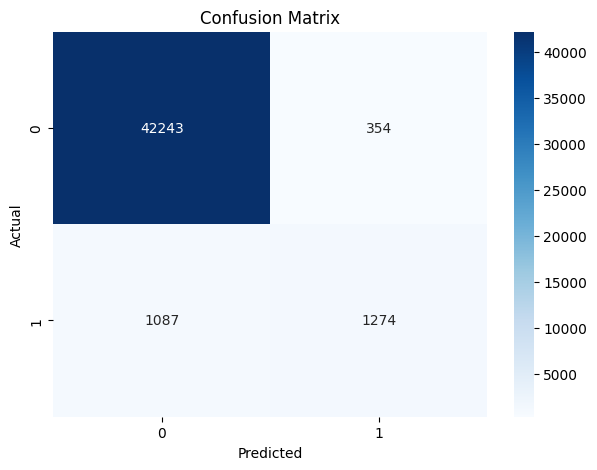

In [40]:
# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Feature Importance Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_14156\1473869239.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


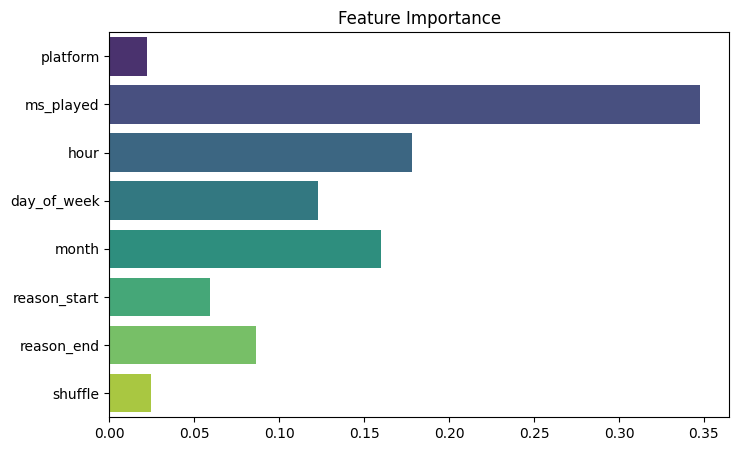

In [41]:
# Feature Importance
importances = model.feature_importances_
feature_names = features

# Visualize feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance')
plt.show()
